In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Feature Selection using LASSO

In [ ]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Feature Selection - COMSYS Hackathon 2/train_df.csv')
df.pop('Unnamed: 0')
# df.head()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

y_test = y_test.map({'Benign': 1, 'Malignant': 0})

In [ ]:
X_train.shape

(40, 22283)

In [ ]:
y_pred,y_test

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 9     0
 14    0
 3     0
 35    1
 10    1
 26    1
 44    1
 4     1
 21    0
 7     1
 Name: Label, dtype: int64)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.9,random_state=46)
y_train = y_train.map({'Benign': 1, 'Malignant': 0})
y_test = y_test.map({'Benign': 1, 'Malignant': 0})


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.7111111111111111
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.71      1.00      0.83        32

    accuracy                           0.71        45
   macro avg       0.36      0.50      0.42        45
weighted avg       0.51      0.71      0.59        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
unique_values, counts = np.unique(lasso.coef_, return_counts=True)

# Get the number of unique values
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)

Number of unique values: 22


In [ ]:
unique_values

array([-8.36281613e-02, -7.54627323e-02, -4.59145126e-02, -3.92751294e-02,
       -3.06024198e-02, -2.07673969e-02, -1.50544323e-02, -1.44666628e-02,
       -1.12580829e-02, -1.05817649e-02, -8.51867534e-03, -6.73248519e-03,
       -4.46058565e-03, -3.09287569e-03, -2.75937054e-03, -2.28848131e-03,
       -2.12938246e-03, -8.10242503e-04, -4.08199873e-04, -4.96091702e-05,
       -0.00000000e+00,  1.43627769e-02])

In [ ]:
counts

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1, 22262,     1])

<Axes: >

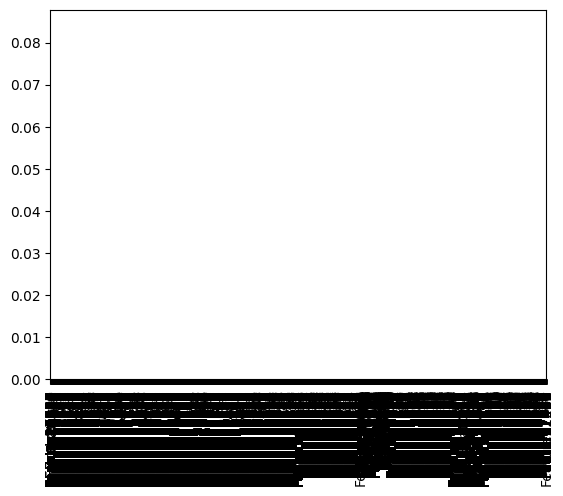

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=X_train.columns)

x.sort_values(ascending=False).plot(kind='bar')

### Feature Selection using Decision Tree

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Feature Selection - COMSYS Hackathon 2/train_df.csv')
df.pop('Unnamed: 0')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=28)

In [ ]:
X_train.head()

In [16]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
len(df.columns)

22285

In [17]:
unique = dt.feature_importances_
unique = [bool(x) for x in unique]

features = df.iloc[:,:-1].columns[unique]

In [18]:
len(features)

2

In [19]:
features

Index(['Feature9381', 'Feature11144'], dtype='object')

In [25]:
unique = rf.feature_importances_
unique = [ True if x >= 0.005 else False for x in unique]

features = df.iloc[:,:-1].columns[unique]

In [28]:
features

Index(['Feature1118', 'Feature1392', 'Feature1916', 'Feature3260',
       'Feature3567', 'Feature3743', 'Feature4132', 'Feature4176',
       'Feature4314', 'Feature4595', 'Feature4659', 'Feature4684',
       'Feature4775', 'Feature5297', 'Feature5326', 'Feature5529',
       'Feature5638', 'Feature5926', 'Feature6065', 'Feature6260',
       'Feature6273', 'Feature6537', 'Feature6596', 'Feature6702',
       'Feature6925', 'Feature7304', 'Feature7399', 'Feature7733',
       'Feature8011', 'Feature8052', 'Feature8071', 'Feature8127',
       'Feature8840', 'Feature9183', 'Feature9343', 'Feature9405',
       'Feature9779', 'Feature10075', 'Feature10278', 'Feature10523',
       'Feature10578', 'Feature10759', 'Feature10924', 'Feature11068',
       'Feature11807', 'Feature12181', 'Feature12210', 'Feature12556',
       'Feature12735', 'Feature12844', 'Feature13002', 'Feature13031',
       'Feature13462', 'Feature13920', 'Feature14034', 'Feature14660',
       'Feature14868', 'Feature14921', 'Fea

<Axes: >

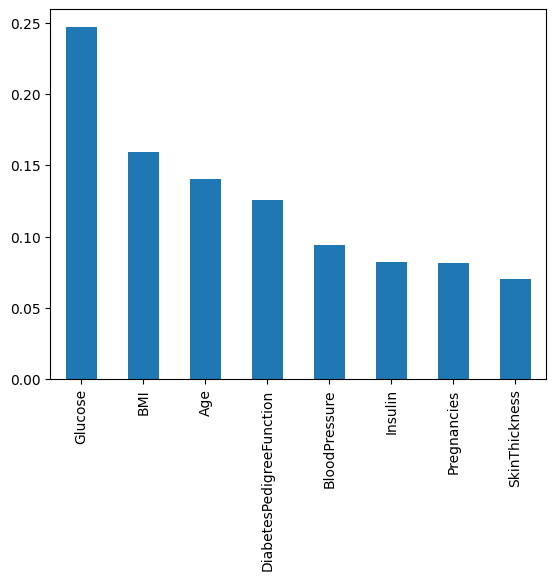

In [ ]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean')

In [ ]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [ ]:
sfm.get_support(indices=True)

array([1, 5, 7])

In [ ]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [ ]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


### Recursive Feature Selection

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.10202703, 0.0229681 , 0.4550667 , 0.41993816])

In [ ]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.20648351, 0.44262499, 0.3508915 ])

In [ ]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.4495768, 0.5504232])

In [ ]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


### Sklearn RFE

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


### Mutual Info

In [ ]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [ ]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob


B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.5165620837092979
Feature 1: Mutual Information = 0.25359508710222656
Feature 2: Mutual Information = 0.9988743750867679
Feature 3: Mutual Information = 0.9803488552640216


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
